# Reinforcement Learning Practical : MAZE ENVIRONMENT (ANALYSIS)

**Agent:** The "player" (represented by player_pos).

**Environment:** The maze is the environment where the agent interacts.

**State:** The state in the simulation is represented by the player's position and the state of the environment (ex. where the walls, doors, and keys are located).

**Actions:** The player can take four actions: UP, DOWN, LEFT, and RIGHT. These actions change the player's position in the environment.

**Rewards:** The player receives rewards based on the state they reach:

  * Goal: +1 reward.
  * Wall: -0.05 penalty.
  * Step: -0.001 penalty.
  * Caught by enemy: -1 penalty.
  * Collecting key or opening door.

### Task 1: Create the environment and identify the actions and rewards

In [1]:
import random

# Maze layout
maze = [
    [1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 1, 2, 0, 1],
    [1, 0, 1, 0, 1, 1, 3, 1],
    [1, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 0, 1],
    [1, 0, 1, 4, 1, 0, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1]
]

# Tile types
tiles = ['empty', 'wall', 'goal', 'door', 'key']

# Initial positions
player_pos = [1, 1]
enemy_pos = [3, 6]
enemy_yv = -1
unlock = 0

# Possible actions
actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']

def get_tile(pos):
    return tiles[maze[pos[0]][pos[1]]]

def move_player(action, pos):
    r, c = pos
    if action == 'UP':
        r -= 1
    elif action == 'DOWN':
        r += 1
    elif action == 'LEFT':
        c -= 1
    elif action == 'RIGHT':
        c += 1
    return [r, c]

def simulate(steps=50):
    global player_pos, enemy_pos, enemy_yv, unlock
    total_reward = 0

    for step in range(steps):
        action = random.choice(actions)
        new_pos = move_player(action, player_pos)
        tile = get_tile(new_pos)

        if tile == 'empty':
            player_pos = new_pos
        elif tile == 'goal':
            total_reward += 1
            print("Goal Reached")
            break
        elif tile == 'key':
            unlock += 1
            maze[new_pos[0]][new_pos[1]] = 0
            player_pos = new_pos
        elif tile == 'door' and unlock > 0:
            unlock -= 1
            maze[new_pos[0]][new_pos[1]] = 0
            player_pos = new_pos
        elif tile == 'wall':
            total_reward -= 0.05

        # Enemy movement
        enemy_pos[0] += enemy_yv
        if get_tile(enemy_pos) == 'wall':
            enemy_yv *= -1

        # Collision check
        if player_pos == enemy_pos:
            total_reward -= 1
            print("Caught by Enemy")
            break

        # Step penalty
        total_reward -= 0.001

        print(f"Step {step+1} | Action={action} | Player={player_pos} | Reward={round(total_reward, 4)}")

    return total_reward

reward = simulate()
print("Total Reward:", reward)

Step 1 | Action=LEFT | Player=[1, 1] | Reward=-0.051
Step 2 | Action=UP | Player=[1, 1] | Reward=-0.102
Step 3 | Action=LEFT | Player=[1, 1] | Reward=-0.153
Step 4 | Action=DOWN | Player=[2, 1] | Reward=-0.154
Step 5 | Action=UP | Player=[1, 1] | Reward=-0.155
Step 6 | Action=LEFT | Player=[1, 1] | Reward=-0.206
Step 7 | Action=DOWN | Player=[2, 1] | Reward=-0.207
Step 8 | Action=LEFT | Player=[2, 1] | Reward=-0.258
Step 9 | Action=DOWN | Player=[3, 1] | Reward=-0.259
Step 10 | Action=UP | Player=[2, 1] | Reward=-0.26
Step 11 | Action=DOWN | Player=[3, 1] | Reward=-0.261
Step 12 | Action=UP | Player=[2, 1] | Reward=-0.262
Step 13 | Action=RIGHT | Player=[2, 1] | Reward=-0.313
Step 14 | Action=DOWN | Player=[3, 1] | Reward=-0.314
Step 15 | Action=LEFT | Player=[3, 1] | Reward=-0.365
Step 16 | Action=DOWN | Player=[4, 1] | Reward=-0.366
Step 17 | Action=LEFT | Player=[4, 1] | Reward=-0.417
Step 18 | Action=UP | Player=[3, 1] | Reward=-0.418
Step 19 | Action=LEFT | Player=[3, 1] | Reward=

### Task 2: Visualization of each step

Step 1: Action=RIGHT, Player=[1, 2], Reward=-0.01


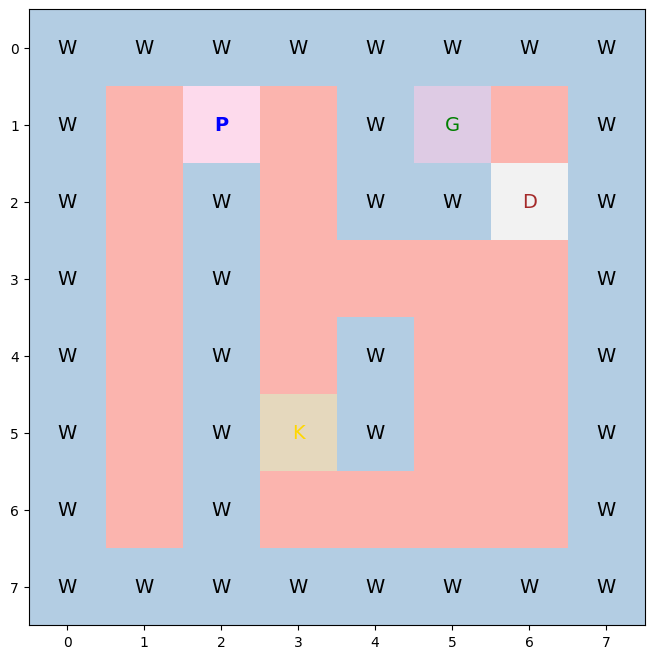

Step 2: Action=LEFT, Player=[1, 1], Reward=-0.02


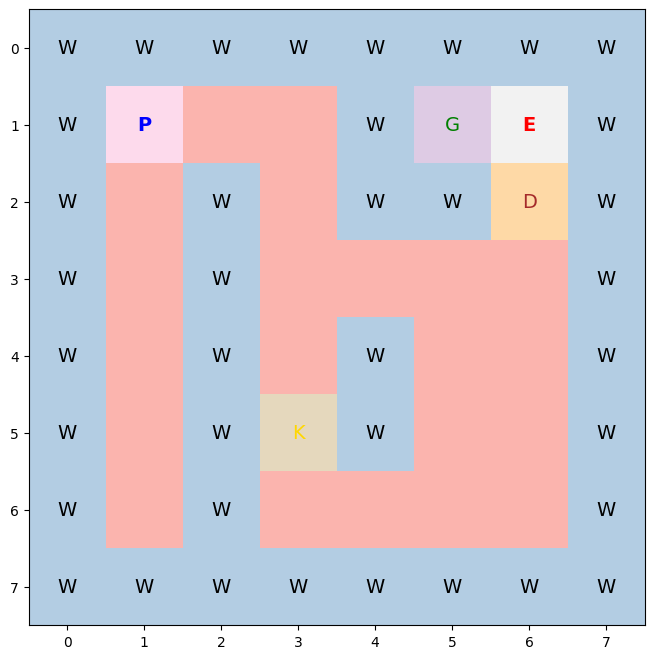

Step 3: Action=DOWN, Player=[2, 1], Reward=-0.03


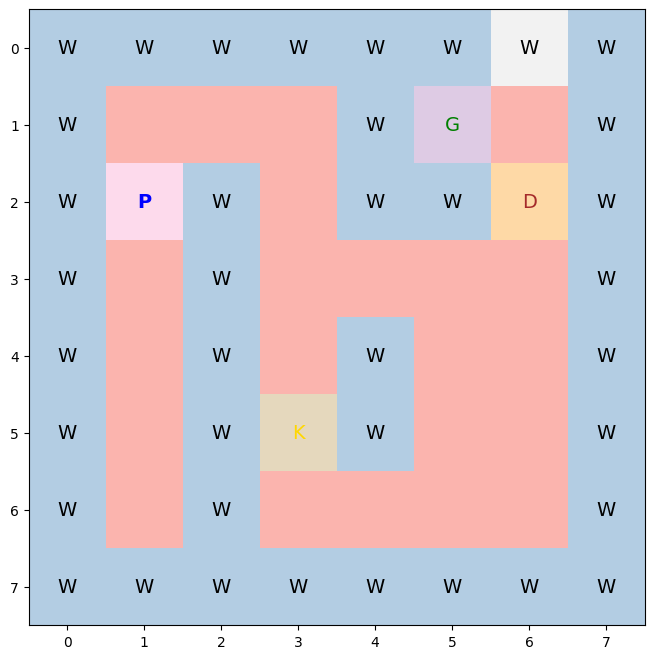

Step 4: Action=LEFT, Player=[2, 1], Reward=-0.14


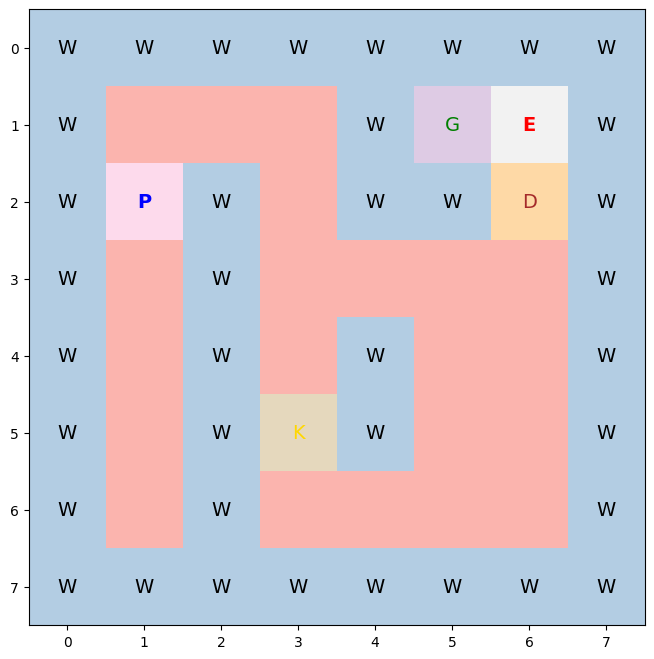

Step 5: Action=UP, Player=[1, 1], Reward=-0.15


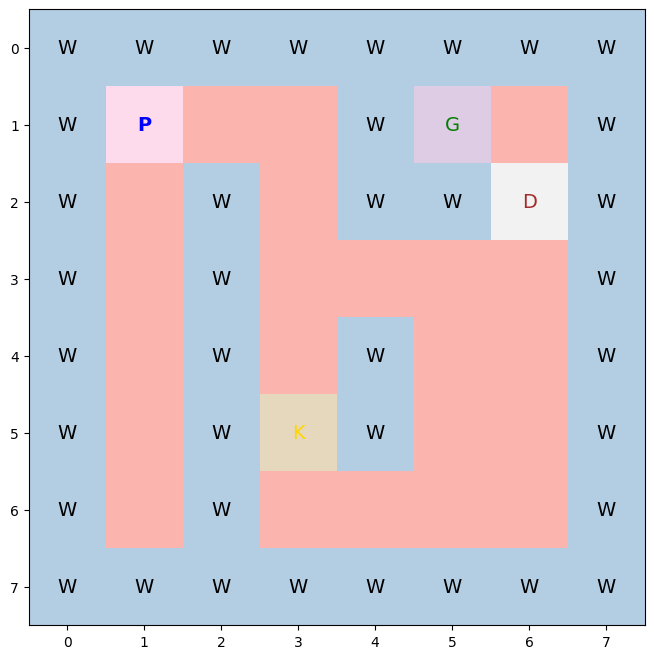

Step 6: Action=RIGHT, Player=[1, 2], Reward=-0.16


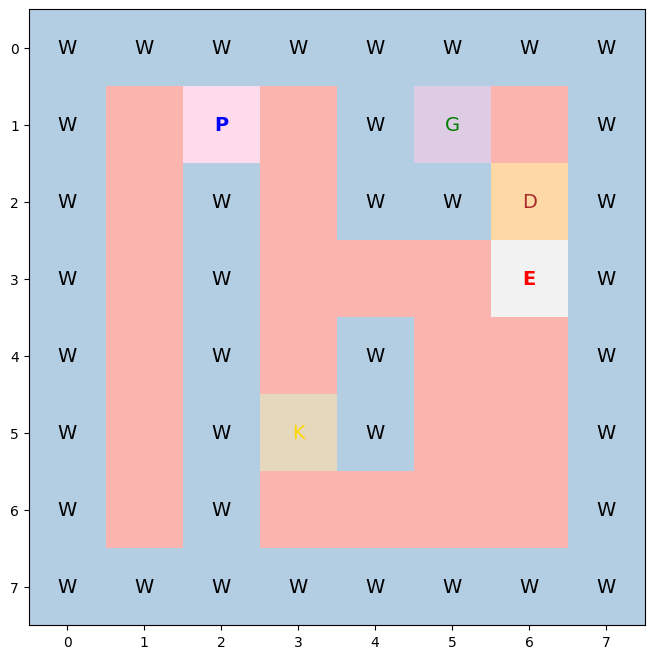

Step 7: Action=DOWN, Player=[1, 2], Reward=-0.27


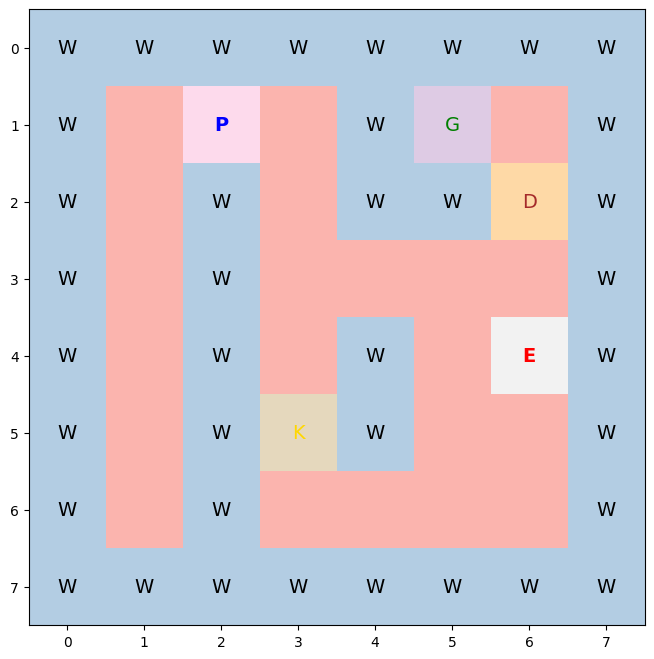

Step 8: Action=LEFT, Player=[1, 1], Reward=-0.28


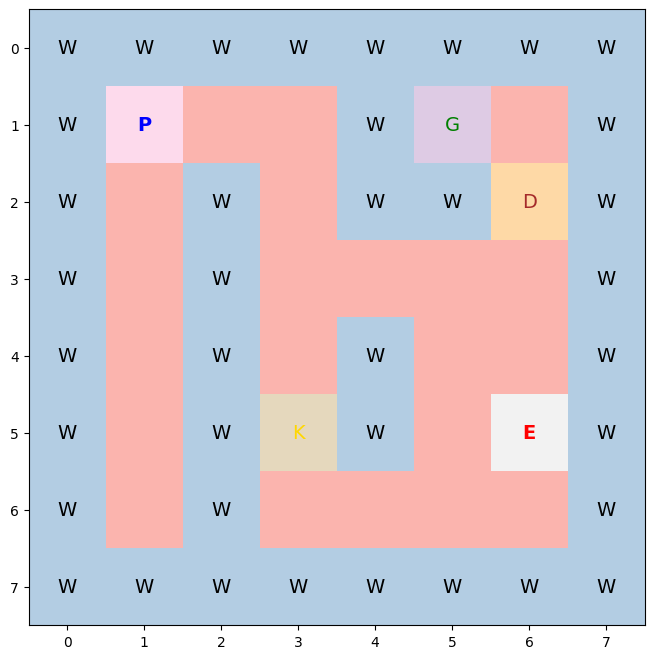

Step 9: Action=LEFT, Player=[1, 1], Reward=-0.39


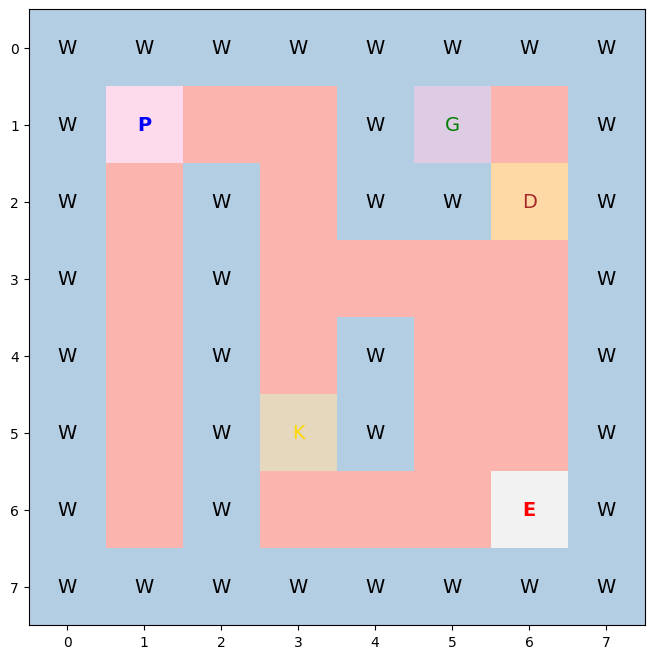

Step 10: Action=LEFT, Player=[1, 1], Reward=-0.5


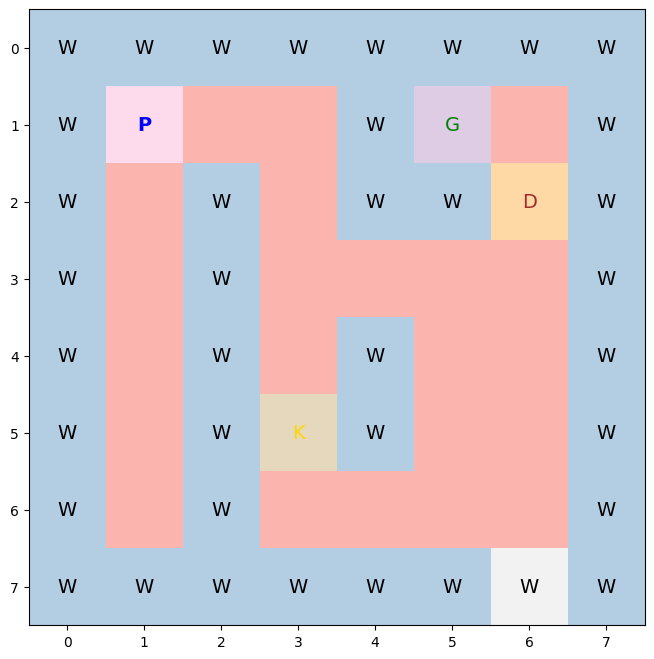

Step 11: Action=RIGHT, Player=[1, 2], Reward=-0.51


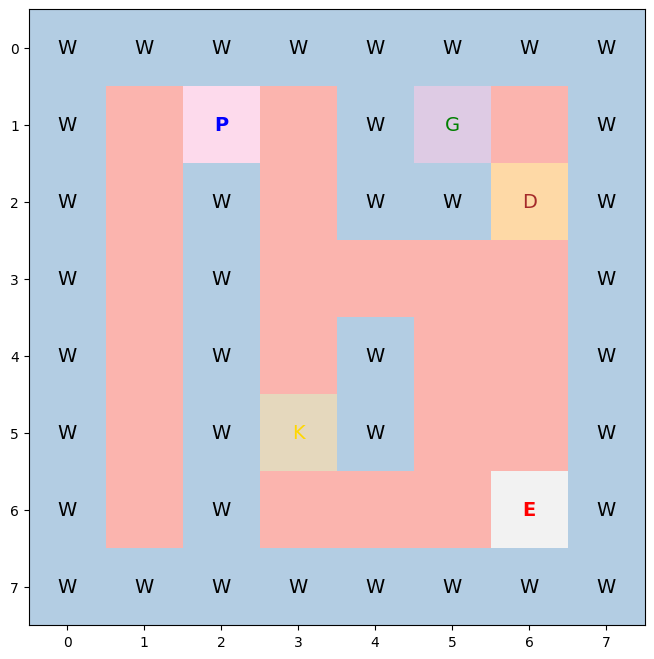

Step 12: Action=UP, Player=[1, 2], Reward=-0.62


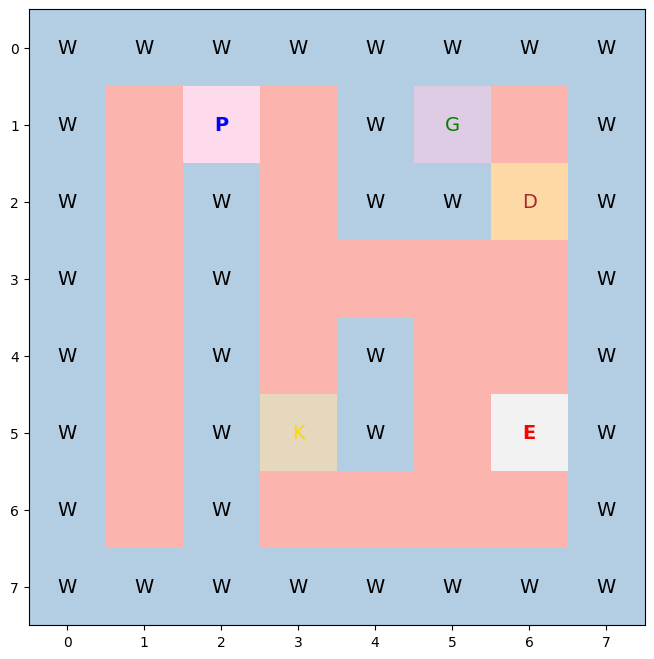

Step 13: Action=LEFT, Player=[1, 1], Reward=-0.63


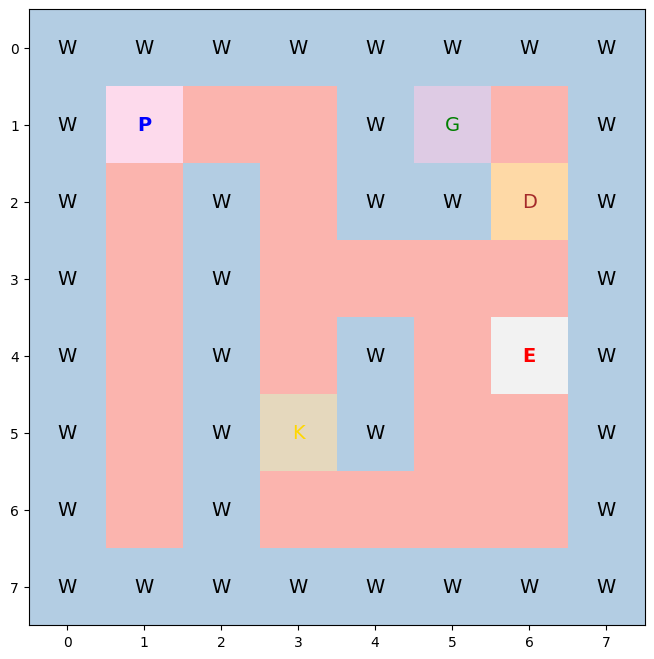

Step 14: Action=LEFT, Player=[1, 1], Reward=-0.74


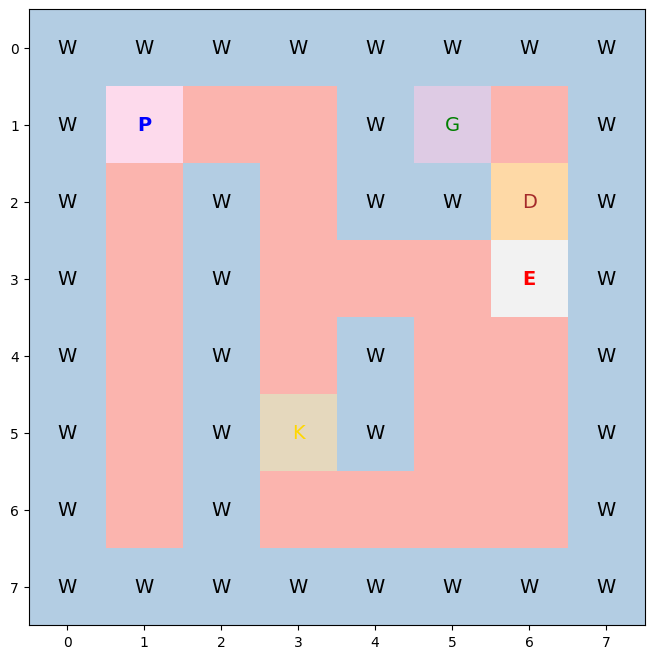

Step 15: Action=DOWN, Player=[2, 1], Reward=-0.75


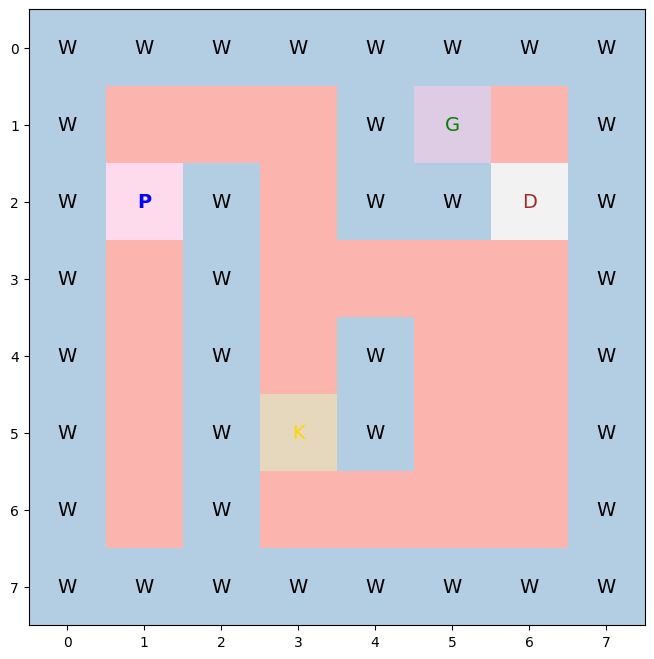

Step 16: Action=UP, Player=[1, 1], Reward=-0.76


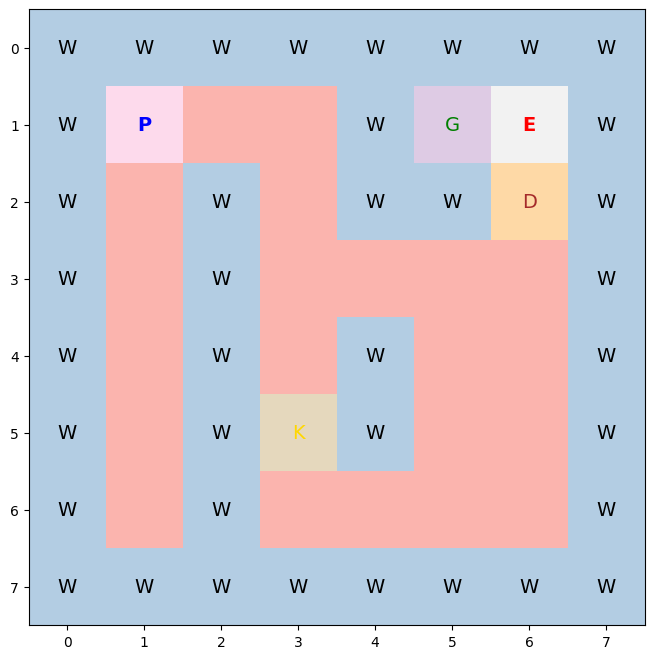

Step 17: Action=RIGHT, Player=[1, 2], Reward=-0.77


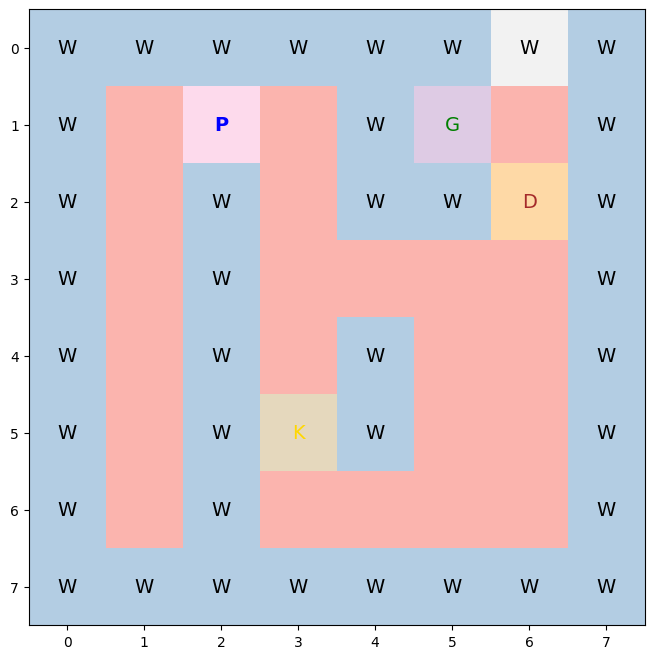

Step 18: Action=RIGHT, Player=[1, 3], Reward=-0.78


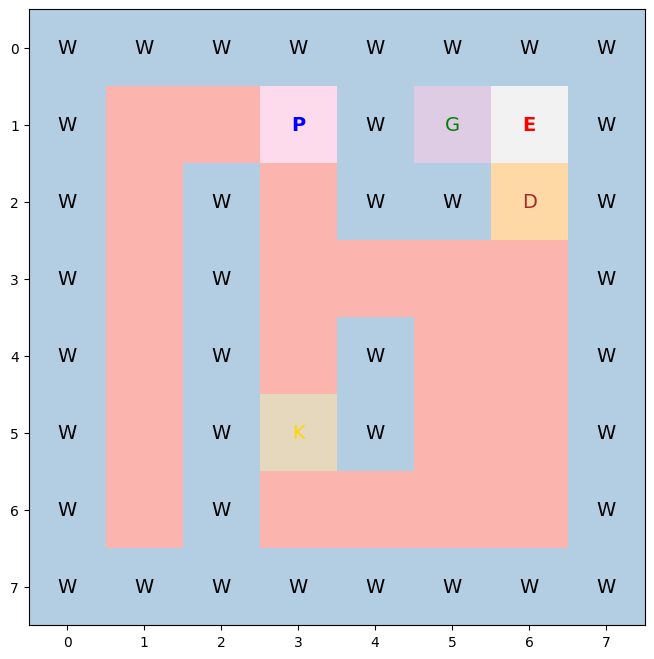

Step 19: Action=DOWN, Player=[2, 3], Reward=-0.79


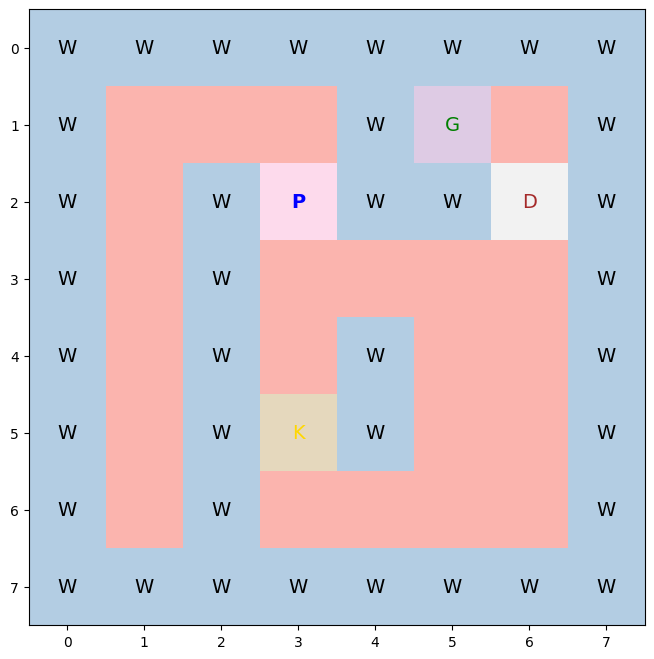

Step 20: Action=DOWN, Player=[3, 3], Reward=-0.8


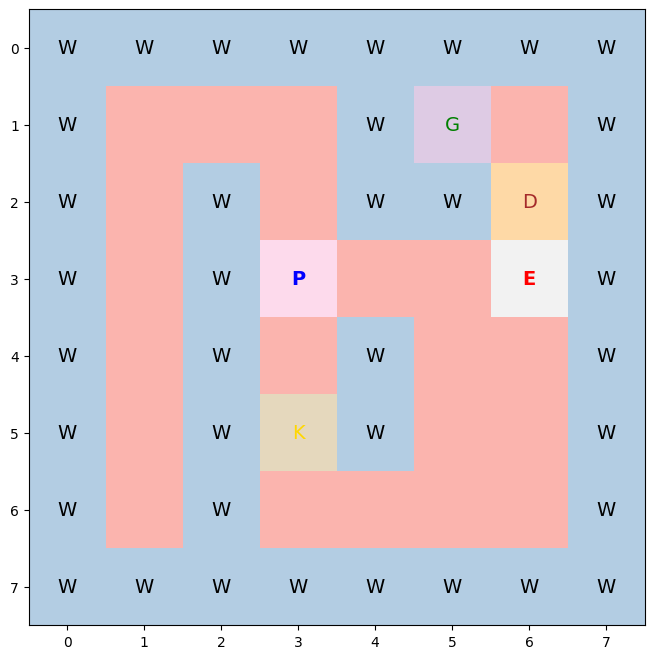

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import copy

maze = [
    [1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 1, 2, 0, 1],
    [1, 0, 1, 0, 1, 1, 3, 1],
    [1, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 0, 1],
    [1, 0, 1, 4, 1, 0, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1]
]

tiles = ['empty', 'wall', 'goal', 'door', 'key']
player_pos = [1, 1]
enemy_pos = [3, 6]
enemy_yv = -1
unlock = 0
actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']

def get_tile(pos):
    return tiles[maze[pos[0]][pos[1]]]

def move_player(action, pos):
    row, col = pos
    if action == 'UP':
        row -= 1
    elif action == 'DOWN':
        row += 1
    elif action == 'LEFT':
        col -= 1
    elif action == 'RIGHT':
        col += 1
    return [row, col]

def visualize_maze(player_pos, enemy_pos):
    visual_maze = np.array(maze, dtype=float)
    visual_maze[player_pos[0], player_pos[1]] = 5
    visual_maze[enemy_pos[0], enemy_pos[1]] = 6

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(visual_maze, cmap='Pastel1', interpolation='nearest')

    for i in range(len(maze)):
        for j in range(len(maze[0])):
            if maze[i][j] == 1:
                ax.text(j, i, 'W', ha='center', va='center', color='black', fontsize=14)
            elif maze[i][j] == 2:
                ax.text(j, i, 'G', ha='center', va='center', color='green', fontsize=14)
            elif maze[i][j] == 3:
                ax.text(j, i, 'D', ha='center', va='center', color='brown', fontsize=14)
            elif maze[i][j] == 4:
                ax.text(j, i, 'K', ha='center', va='center', color='gold', fontsize=14)
            elif visual_maze[i, j] == 5:
                ax.text(j, i, 'P', ha='center', va='center', color='blue', fontsize=14, weight='bold')
            elif visual_maze[i, j] == 6:
                ax.text(j, i, 'E', ha='center', va='center', color='red', fontsize=14, weight='bold')
    plt.show()

def simulate_with_viz(steps=20):
    global player_pos, enemy_pos, unlock, enemy_yv
    total_reward = 0

    for step in range(steps):
        action = random.choice(actions)
        new_pos = move_player(action, player_pos)
        tile = get_tile(new_pos)

        if tile == 'empty':
            player_pos = new_pos
        elif tile == 'goal':
            print("Goal Reached!")
            total_reward += 1
            visualize_maze(player_pos, enemy_pos)
            break
        elif tile == 'key':
            unlock += 1
            maze[new_pos[0]][new_pos[1]] = 0
            player_pos = new_pos
        elif tile == 'door' and unlock > 0:
            unlock -= 1
            maze[new_pos[0]][new_pos[1]] = 0
            player_pos = new_pos
        elif tile == 'wall':
            total_reward -= 0.1

        enemy_pos[0] += enemy_yv
        if get_tile(enemy_pos) == 'wall':
            enemy_yv *= -1
        
        if player_pos == enemy_pos:
            print("Caught by Enemy!")
            total_reward -= 1
            visualize_maze(player_pos, enemy_pos)
            break

        total_reward -= 0.01
        print(f"Step {step + 1}: Action={action}, Player={player_pos}, Reward={round(total_reward, 4)}")
        visualize_maze(player_pos, enemy_pos)
        time.sleep(0.5)

    return total_reward

reward = simulate_with_viz()

### Task 3: Custom Actions (User-Controlled Agent)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import copy

maze = [
    [1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 1, 2, 0, 1],
    [1, 0, 1, 0, 1, 1, 3, 1],
    [1, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 0, 1],
    [1, 0, 1, 4, 1, 0, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1]
]

tiles = ['empty', 'wall', 'goal', 'door', 'key']
player_pos = [1, 1]
enemy_pos = [3, 6]
enemy_yv = -1
unlock = 0
actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']

def get_tile(pos):
    return tiles[maze[pos[0]][pos[1]]]

def move_player(action, pos):
    row, col = pos
    if action == 'UP':
        row -= 1
    elif action == 'DOWN':
        row += 1
    elif action == 'LEFT':
        col -= 1
    elif action == 'RIGHT':
        col += 1
    return [row, col]

def visualize_maze(player_pos, enemy_pos):
    visual_maze = np.array(maze, dtype=float)
    visual_maze[player_pos[0], player_pos[1]] = 5
    visual_maze[enemy_pos[0], enemy_pos[1]] = 6

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(visual_maze, cmap='Pastel1', interpolation='nearest')

    for i in range(len(maze)):
        for j in range(len(maze[0])):
            if maze[i][j] == 1:
                ax.text(j, i, 'W', ha='center', va='center', color='black', fontsize=14)
            elif maze[i][j] == 2:
                ax.text(j, i, 'G', ha='center', va='center', color='green', fontsize=14)
            elif maze[i][j] == 3:
                ax.text(j, i, 'D', ha='center', va='center', color='brown', fontsize=14)
            elif maze[i][j] == 4:
                ax.text(j, i, 'K', ha='center', va='center', color='gold', fontsize=14)
            elif visual_maze[i, j] == 5:
                ax.text(j, i, 'P', ha='center', va='center', color='blue', fontsize=14, weight='bold')
            elif visual_maze[i, j] == 6:
                ax.text(j, i, 'E', ha='center', va='center', color='red', fontsize=14, weight='bold')
    plt.show()

def simulate_with_viz(steps=20):
    global player_pos, enemy_pos, unlock, enemy_yv
    total_reward = 0

    for step in range(steps):
        action = input("Enter action (UP/DOWN/LEFT/RIGHT): ").upper()
        new_pos = move_player(action, player_pos)
        tile = get_tile(new_pos)

        if tile == 'empty':
            player_pos = new_pos
        elif tile == 'goal':
            print("Goal Reached!")
            total_reward += 1
            visualize_maze(player_pos, enemy_pos)
            break
        elif tile == 'key':
            unlock += 1
            maze[new_pos[0]][new_pos[1]] = 0
            player_pos = new_pos
        elif tile == 'door' and unlock > 0:
            unlock -= 1
            maze[new_pos[0]][new_pos[1]] = 0
            player_pos = new_pos
        elif tile == 'wall':
            total_reward -= 0.1

        enemy_pos[0] += enemy_yv
        if get_tile(enemy_pos) == 'wall':
            enemy_yv *= -1
        
        if player_pos == enemy_pos:
            print("Caught by Enemy!")
            total_reward -= 1
            visualize_maze(player_pos, enemy_pos)
            break

        total_reward -= 0.01
        print(f"Step {step + 1}: Action={action}, Player={player_pos}, Reward={round(total_reward, 4)}")
        visualize_maze(player_pos, enemy_pos)
        time.sleep(0.5)

    return total_reward

reward = simulate_with_viz()

# # # # # # # # 
# P . . # G . # 
# . # . # # D # 
# . # . . . E # 
# . # . # . . # 
# . # K # . . # 
# . # . . . . # 
# # # # # # # # 

Step 1 | Action=UP | Player=[1, 1] | Reward=-0.051
# # # # # # # # 
# P . . # G . # 
# . # . # # E # 
# . # . . . . # 
# . # . # . . # 
# . # K # . . # 
# . # . . . . # 
# # # # # # # # 

Invalid action. Try again.
# # # # # # # # 
# P . . # G . # 
# . # . # # E # 
# . # . . . . # 
# . # . # . . # 
# . # K # . . # 
# . # . . . . # 
# # # # # # # # 

Invalid action. Try again.
# # # # # # # # 
# P . . # G . # 
# . # . # # E # 
# . # . . . . # 
# . # . # . . # 
# . # K # . . # 
# . # . . . . # 
# # # # # # # # 

Invalid action. Try again.
# # # # # # # # 
# P . . # G . # 
# . # . # # E # 
# . # . . . . # 
# . # . # . . # 
# . # K # . . # 
# . # . . . . # 
# # # # # # # # 

Invalid action. Try again.
# # # # # # # # 
# P . . # G . # 
# . # . # # E # 
# . # . . . . # 
# . # . # . . # 
# . # K # . . # 
# . # . . . . # 
# # # # # # # # 

Invalid action. Try

### Task 4: Add value function using Manhattan distance

In [ ]:
import random
import copy

maze = [
    [1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 1, 2, 0, 1],
    [1, 0, 1, 0, 1, 1, 3, 1],
    [1, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 0, 1],
    [1, 0, 1, 4, 1, 0, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1]
]

tiles = ['empty', 'wall', 'goal', 'door', 'key']
goal_pos = [1, 5]
player_pos = [1, 1]
enemy_pos = [3, 6]
enemy_yv = -1
unlock = 0
actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']

def manhattan_distance(pos1, pos2):
    return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])

def get_tile(pos):
    return tiles[maze[pos[0]][pos[1]]]

def move_player(action, pos):
    r, c = pos
    if action == 'UP':
        r -= 1
    elif action == 'DOWN':
        r += 1
    elif action == 'LEFT':
        c -= 1
    elif action == 'RIGHT':
        c += 1
    return [r, c]

def simulate_with_distance(steps=50):
    global player_pos, enemy_pos, enemy_yv, unlock
    total_reward = 0
    prev_distance = manhattan_distance(player_pos, goal_pos)

    for step in range(steps):
        action = random.choice(actions)
        new_pos = move_player(action, player_pos)
        tile = get_tile(new_pos)
        
        current_distance = manhattan_distance(new_pos, goal_pos)
        distance_reward = 0

        if tile == 'empty':
            player_pos = new_pos
            if current_distance < prev_distance:
                distance_reward = 0.1
                print(f"  → Moved closer to goal! Distance: {prev_distance} → {current_distance} (+{distance_reward})")
            elif current_distance > prev_distance:
                distance_reward = -0.05
                print(f"  → Moved away from goal. Distance: {prev_distance} → {current_distance} ({distance_reward})")
            prev_distance = current_distance
        elif tile == 'goal':
            total_reward += 1
            print("Goal Reached!")
            break
        elif tile == 'key':
            unlock += 1
            maze[new_pos[0]][new_pos[1]] = 0
            player_pos = new_pos
            prev_distance = current_distance
        elif tile == 'door' and unlock > 0:
            unlock -= 1
            maze[new_pos[0]][new_pos[1]] = 0
            player_pos = new_pos
            prev_distance = current_distance
        elif tile == 'wall':
            total_reward -= 0.05

        enemy_pos[0] += enemy_yv
        if get_tile(enemy_pos) == 'wall':
            enemy_yv *= -1

        if player_pos == enemy_pos:
            total_reward -= 1
            print("Caught by Enemy!")
            break

        total_reward += distance_reward - 0.001
        print(f"Step {step+1} | Action={action} | Player={player_pos} | Distance={current_distance} | Reward={round(total_reward, 4)}")

    return total_reward

reward = simulate_with_distance()
print(f"\nFinal Total Reward: {round(reward, 4)}")

### Task 5: Handle invalid states and collisions

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

maze = [
    [1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 1, 2, 0, 1],
    [1, 0, 1, 0, 1, 1, 3, 1],
    [1, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 0, 1],
    [1, 0, 1, 4, 1, 0, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1]
]

tiles = ['empty', 'wall', 'goal', 'door', 'key']
player_pos = [1, 1]
enemy_pos = [3, 6]
enemy_yv = -1
unlock = 0
actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']

def is_valid_position(pos):
    return 0 <= pos[0] < len(maze) and 0 <= pos[1] < len(maze[0])

def get_tile(pos):
    if not is_valid_position(pos):
        return 'invalid'
    return tiles[maze[pos[0]][pos[1]]]

def move_player(action, pos):
    r, c = pos
    if action == 'UP':
        r -= 1
    elif action == 'DOWN':
        r += 1
    elif action == 'LEFT':
        c -= 1
    elif action == 'RIGHT':
        c += 1
    return [r, c]

def visualize_collision(player_pos, enemy_pos, blocked_pos=None):
    visual_maze = np.array(maze, dtype=float)
    visual_maze[player_pos[0], player_pos[1]] = 5
    visual_maze[enemy_pos[0], enemy_pos[1]] = 6
    if blocked_pos and is_valid_position(blocked_pos):
        visual_maze[blocked_pos[0], blocked_pos[1]] = 7

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(visual_maze, cmap='Pastel1', interpolation='nearest')

    for i in range(len(maze)):
        for j in range(len(maze[0])):
            if visual_maze[i, j] == 7:
                ax.text(j, i, 'X', ha='center', va='center', color='red', fontsize=16, weight='bold')
            elif maze[i][j] == 1:
                ax.text(j, i, 'W', ha='center', va='center', color='black')
            elif maze[i][j] == 2:
                ax.text(j, i, 'G', ha='center', va='center', color='green')
            elif maze[i][j] == 3:
                ax.text(j, i, 'D', ha='center', va='center', color='brown')
            elif maze[i][j] == 4:
                ax.text(j, i, 'K', ha='center', va='center', color='gold')
            elif visual_maze[i, j] == 5:
                ax.text(j, i, 'P', ha='center', va='center', color='blue', fontsize=14, weight='bold')
            elif visual_maze[i, j] == 6:
                ax.text(j, i, 'E', ha='center', va='center', color='red', fontsize=14, weight='bold')
    plt.show()

def simulate_with_collision_handling(steps=50):
    global player_pos, enemy_pos, enemy_yv, unlock
    total_reward = 0

    for step in range(steps):
        action = random.choice(actions)
        new_pos = move_player(action, player_pos)
        
        # Check boundary
        if not is_valid_position(new_pos):
            total_reward -= 0.1
            print(f"Step {step+1}: Action={action} → Out of bounds! Penalty=-0.1")
            visualize_collision(player_pos, enemy_pos, new_pos)
            continue

        tile = get_tile(new_pos)

        if tile == 'wall':
            total_reward -= 0.05
            print(f"Step {step+1}: Action={action} → Hit wall! Penalty=-0.05")
            visualize_collision(player_pos, enemy_pos, new_pos)
        elif tile == 'door' and unlock == 0:
            total_reward -= 0.05
            print(f"Step {step+1}: Action={action} → Door locked! Need key. Penalty=-0.05")
            visualize_collision(player_pos, enemy_pos, new_pos)
        elif tile == 'empty':
            player_pos = new_pos
        elif tile == 'goal':
            player_pos = new_pos
            total_reward += 1
            print(f"Step {step+1}: Goal Reached!")
            visualize_collision(player_pos, enemy_pos)
            break
        elif tile == 'key':
            unlock += 1
            maze[new_pos[0]][new_pos[1]] = 0
            player_pos = new_pos
            print(f"Step {step+1}: Collected key!")
        elif tile == 'door' and unlock > 0:
            unlock -= 1
            maze[new_pos[0]][new_pos[1]] = 0
            player_pos = new_pos
            print(f"Step {step+1}: Opened door!")

        # Enemy movement
        old_enemy_pos = enemy_pos.copy()
        enemy_pos[0] += enemy_yv
        if get_tile(enemy_pos) == 'wall':
            enemy_yv *= -1
            enemy_pos = old_enemy_pos

        # Collision detection
        if player_pos == enemy_pos:
            total_reward -= 1
            print(f"Step {step+1}: Collision with enemy! Penalty=-1")
            visualize_collision(player_pos, enemy_pos)
            break

        total_reward -= 0.001
        print(f"Step {step+1}: Action={action}, Player={player_pos}, Reward={round(total_reward, 4)}")

    return total_reward

reward = simulate_with_collision_handling(30)
print(f"\nFinal Reward: {round(reward, 4)}")

### Task 6: Episode Control

In [ ]:
import random
import copy

def reset_maze():
    return [
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1, 2, 0, 1],
        [1, 0, 1, 0, 1, 1, 3, 1],
        [1, 0, 1, 0, 0, 0, 0, 1],
        [1, 0, 1, 0, 1, 0, 0, 1],
        [1, 0, 1, 4, 1, 0, 0, 1],
        [1, 0, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1]
    ]

tiles = ['empty', 'wall', 'goal', 'door', 'key']
actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']

def get_tile(maze, pos):
    return tiles[maze[pos[0]][pos[1]]]

def move_player(action, pos):
    r, c = pos
    if action == 'UP':
        r -= 1
    elif action == 'DOWN':
        r += 1
    elif action == 'LEFT':
        c -= 1
    elif action == 'RIGHT':
        c += 1
    return [r, c]

def run_episode(max_steps=100, verbose=True):
    maze = reset_maze()
    player_pos = [1, 1]
    enemy_pos = [3, 6]
    enemy_yv = -1
    unlock = 0
    total_reward = 0
    outcome = None

    for step in range(max_steps):
        action = random.choice(actions)
        new_pos = move_player(action, player_pos)
        tile = get_tile(maze, new_pos)

        if tile == 'empty':
            player_pos = new_pos
        elif tile == 'goal':
            total_reward += 1
            outcome = 'Win'
            if verbose:
                print(f"Step {step+1}: Goal Reached!")
            break
        elif tile == 'key':
            unlock += 1
            maze[new_pos[0]][new_pos[1]] = 0
            player_pos = new_pos
        elif tile == 'door' and unlock > 0:
            unlock -= 1
            maze[new_pos[0]][new_pos[1]] = 0
            player_pos = new_pos
        elif tile == 'wall':
            total_reward -= 0.05

        enemy_pos[0] += enemy_yv
        if get_tile(maze, enemy_pos) == 'wall':
            enemy_yv *= -1

        if player_pos == enemy_pos:
            total_reward -= 1
            outcome = 'Loss'
            if verbose:
                print(f"Step {step+1}: Caught by Enemy!")
            break

        total_reward -= 0.001

        if verbose and step % 10 == 0:
            print(f"Step {step+1}: Player={player_pos}, Reward={round(total_reward, 4)}")

    if outcome is None:
        outcome = 'Timeout'
        if verbose:
            print(f"Max steps ({max_steps}) exceeded!")

    steps_taken = step + 1 if outcome != 'Timeout' else max_steps
    return total_reward, steps_taken, outcome

# User-adjustable settings
max_steps = int(input("Enter maximum steps per episode (default 100): ") or 100)
num_episodes = int(input("Enter number of episodes to run (default 5): ") or 5)

print(f"\n=== Running {num_episodes} Episodes (Max Steps: {max_steps}) ===\n")

results = []
for i in range(num_episodes):
    print(f"\n--- Episode {i+1} ---")
    reward, steps, outcome = run_episode(max_steps, verbose=False)
    results.append((reward, steps, outcome))
    print(f"Outcome: {outcome} | Steps: {steps} | Total Reward: {round(reward, 4)}")

# Episode Summary
print("\n=== Episode Summary ===")
wins = sum([1 for r in results if r[2] == 'Win'])
losses = sum([1 for r in results if r[2] == 'Loss'])
timeouts = sum([1 for r in results if r[2] == 'Timeout'])
avg_reward = sum([r[0] for r in results]) / num_episodes
avg_steps = sum([r[1] for r in results]) / num_episodes

print(f"Total Episodes: {num_episodes}")
print(f"Wins: {wins} | Losses: {losses} | Timeouts: {timeouts}")
print(f"Average Reward: {round(avg_reward, 4)}")
print(f"Average Steps: {round(avg_steps, 2)}")

### Task 7: Cumulative Reward Tracking

In [ ]:
import random
import matplotlib.pyplot as plt

def reset_maze():
    return [
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1, 2, 0, 1],
        [1, 0, 1, 0, 1, 1, 3, 1],
        [1, 0, 1, 0, 0, 0, 0, 1],
        [1, 0, 1, 0, 1, 0, 0, 1],
        [1, 0, 1, 4, 1, 0, 0, 1],
        [1, 0, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1]
    ]

tiles = ['empty', 'wall', 'goal', 'door', 'key']
actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']

def get_tile(maze, pos):
    return tiles[maze[pos[0]][pos[1]]]

def move_player(action, pos):
    r, c = pos
    if action == 'UP':
        r -= 1
    elif action == 'DOWN':
        r += 1
    elif action == 'LEFT':
        c -= 1
    elif action == 'RIGHT':
        c += 1
    return [r, c]

def run_episode_with_tracking(max_steps=100):
    maze = reset_maze()
    player_pos = [1, 1]
    enemy_pos = [3, 6]
    enemy_yv = -1
    unlock = 0
    
    step_rewards = []
    cumulative_rewards = []
    cumulative = 0

    for step in range(max_steps):
        action = random.choice(actions)
        new_pos = move_player(action, player_pos)
        tile = get_tile(maze, new_pos)
        
        step_reward = 0

        if tile == 'empty':
            player_pos = new_pos
        elif tile == 'goal':
            step_reward += 1
            cumulative += step_reward
            step_rewards.append(step_reward)
            cumulative_rewards.append(cumulative)
            print(f"Step {step+1}: Goal Reached! Step Reward={step_reward}, Cumulative={round(cumulative, 4)}")
            break
        elif tile == 'key':
            unlock += 1
            maze[new_pos[0]][new_pos[1]] = 0
            player_pos = new_pos
        elif tile == 'door' and unlock > 0:
            unlock -= 1
            maze[new_pos[0]][new_pos[1]] = 0
            player_pos = new_pos
        elif tile == 'wall':
            step_reward -= 0.05

        enemy_pos[0] += enemy_yv
        if get_tile(maze, enemy_pos) == 'wall':
            enemy_yv *= -1

        if player_pos == enemy_pos:
            step_reward -= 1
            cumulative += step_reward
            step_rewards.append(step_reward)
            cumulative_rewards.append(cumulative)
            print(f"Step {step+1}: Caught by Enemy! Step Reward={step_reward}, Cumulative={round(cumulative, 4)}")
            break

        step_reward -= 0.001
        cumulative += step_reward
        step_rewards.append(step_reward)
        cumulative_rewards.append(cumulative)

        if step % 10 == 0:
            print(f"Step {step+1}: Step Reward={round(step_reward, 4)}, Cumulative Reward={round(cumulative, 4)}")

    return step_rewards, cumulative_rewards

# Run episode
step_rewards, cumulative_rewards = run_episode_with_tracking(100)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(range(1, len(step_rewards) + 1), step_rewards, marker='o', color='blue')
axes[0].set_xlabel('Step')
axes[0].set_ylabel('Step Reward')
axes[0].set_title('Step Reward at Each Time Step')
axes[0].grid(True)

axes[1].plot(range(1, len(cumulative_rewards) + 1), cumulative_rewards, marker='o', color='green')
axes[1].set_xlabel('Step')
axes[1].set_ylabel('Cumulative Reward')
axes[1].set_title('Cumulative Reward vs. Steps')
axes[1].grid(True)

plt.tight_layout()
plt.show()

print(f"\nFinal Cumulative Reward: {round(cumulative_rewards[-1], 4)}")
print(f"Total Steps: {len(step_rewards)}")

### Task 8: Discounted Return

In [ ]:
import random
import matplotlib.pyplot as plt

def reset_maze():
    return [
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1, 2, 0, 1],
        [1, 0, 1, 0, 1, 1, 3, 1],
        [1, 0, 1, 0, 0, 0, 0, 1],
        [1, 0, 1, 0, 1, 0, 0, 1],
        [1, 0, 1, 4, 1, 0, 0, 1],
        [1, 0, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1]
    ]

tiles = ['empty', 'wall', 'goal', 'door', 'key']
actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']

def get_tile(maze, pos):
    return tiles[maze[pos[0]][pos[1]]]

def move_player(action, pos):
    r, c = pos
    if action == 'UP':
        r -= 1
    elif action == 'DOWN':
        r += 1
    elif action == 'LEFT':
        c -= 1
    elif action == 'RIGHT':
        c += 1
    return [r, c]

def calculate_discounted_return(rewards, gamma):
    discounted_return = 0
    for t, reward in enumerate(rewards):
        discounted_return += (gamma ** t) * reward
    return discounted_return

def run_episode_with_discount(max_steps=100, gamma=0.95):
    maze = reset_maze()
    player_pos = [1, 1]
    enemy_pos = [3, 6]
    enemy_yv = -1
    unlock = 0
    
    step_rewards = []

    for step in range(max_steps):
        action = random.choice(actions)
        new_pos = move_player(action, player_pos)
        tile = get_tile(maze, new_pos)
        
        step_reward = 0

        if tile == 'empty':
            player_pos = new_pos
        elif tile == 'goal':
            step_reward += 1
            step_rewards.append(step_reward)
            break
        elif tile == 'key':
            unlock += 1
            maze[new_pos[0]][new_pos[1]] = 0
            player_pos = new_pos
        elif tile == 'door' and unlock > 0:
            unlock -= 1
            maze[new_pos[0]][new_pos[1]] = 0
            player_pos = new_pos
        elif tile == 'wall':
            step_reward -= 0.05

        enemy_pos[0] += enemy_yv
        if get_tile(maze, enemy_pos) == 'wall':
            enemy_yv *= -1

        if player_pos == enemy_pos:
            step_reward -= 1
            step_rewards.append(step_reward)
            break

        step_reward -= 0.001
        step_rewards.append(step_reward)

    cumulative_reward = sum(step_rewards)
    discounted_return = calculate_discounted_return(step_rewards, gamma)
    
    return step_rewards, cumulative_reward, discounted_return

# User input for gamma
gamma = float(input("Enter discount factor gamma (0.9-0.99, default 0.95): ") or 0.95)
num_episodes = int(input("Enter number of episodes (default 5): ") or 5)

print(f"\n=== Running {num_episodes} Episodes with Gamma={gamma} ===\n")

cumulative_results = []
discounted_results = []

for i in range(num_episodes):
    rewards, cumulative, discounted = run_episode_with_discount(100, gamma)
    cumulative_results.append(cumulative)
    discounted_results.append(discounted)
    print(f"Episode {i+1}:")
    print(f"  Steps: {len(rewards)}")
    print(f"  Cumulative Reward: {round(cumulative, 4)}")
    print(f"  Discounted Return (γ={gamma}): {round(discounted, 4)}")
    print()

# Comparison
avg_cumulative = sum(cumulative_results) / num_episodes
avg_discounted = sum(discounted_results) / num_episodes

print("=== Summary ===")
print(f"Average Cumulative Reward: {round(avg_cumulative, 4)}")
print(f"Average Discounted Return (γ={gamma}): {round(avg_discounted, 4)}")
print(f"Difference: {round(avg_cumulative - avg_discounted, 4)}")

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))

x = range(1, num_episodes + 1)
ax.plot(x, cumulative_results, marker='o', label='Cumulative Reward', color='blue')
ax.plot(x, discounted_results, marker='s', label=f'Discounted Return (γ={gamma})', color='red')
ax.set_xlabel('Episode')
ax.set_ylabel('Return')
ax.set_title('Cumulative Reward vs. Discounted Return')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

# Show effect of different gamma values
print("\n=== Effect of Different Gamma Values ===")
sample_rewards = [-0.001] * 10 + [1.0]
gammas = [0.9, 0.95, 0.99, 1.0]

for g in gammas:
    disc_ret = calculate_discounted_return(sample_rewards, g)
    print(f"γ={g}: Discounted Return = {round(disc_ret, 4)}")

print(f"\nCumulative (no discount): {round(sum(sample_rewards), 4)}")